In [1]:
import numpy as np
import pandas as pd

In [72]:
import folium
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json
import glob
import os

In [3]:
filename=r'C:/Users/Adey/OneDrive/IBM_DS/CAPSTONE_FINAL_PREP/Wards_December_2017_Gosport.geojson'

In [4]:
with open(filename) as json_data:
    data = json.load(json_data,) 

for wd17nm in data:
    print(wd17nm)

type
features


In [5]:
gosport_geo = data
wards = data['features']

In [6]:
wards[0]

{'type': 'Feature',
 'properties': {'objectid': 2888,
  'wd17cd': 'E05004531',
  'wd17nm': 'Alverstoke',
  'wd17nmw': ' ',
  'bng_e': 459199,
  'bng_n': 98865,
  'long': -1.16156006,
  'lat': 50.78630066,
  'st_areashape': 1710002.418025,
  'st_lengthshape': 8139.1422723535525},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-1.175976741370578, 50.78645581364621],
    [-1.1710693569427526, 50.78560004875168],
    [-1.1662733959587825, 50.785576665989836],
    [-1.1613737860191378, 50.78437606318475],
    [-1.1548602508996526, 50.78166445349546],
    [-1.1497909281051355, 50.77828503753998],
    [-1.1485538033992244, 50.77892618346102],
    [-1.1484996713197095, 50.782370053781186],
    [-1.1474442447667903, 50.78611955237203],
    [-1.142815734717874, 50.79043994744174],
    [-1.145249737103155, 50.791481185063795],
    [-1.1450912084185592, 50.79223897972083],
    [-1.1493600659490448, 50.79296084708993],
    [-1.1517407335505851, 50.79311853489873],
    [-1.1519353649920232, 50

In [73]:
#gosport lat and long
lat = 50.80
long = -1.13

#change to current dir
os.chdir(r'C:\Users\Adey\OneDrive\IBM_DS\Capstone')

In [74]:
gosportmap = folium.Map(location=[lat,long], zoom_start=13)
folium.GeoJson(
    gosport_geo,
    name='geojson'
).add_to(gosportmap)
for lat, long, name in zip(neighbourhoods['Latitude'],neighbourhoods['Longitude'],neighbourhoods['Neighbourhood']):
    folium.Marker([lat,long], popup = name).add_to(gosportmap)
gosportmap.save('gosport.html')
gosportmap

In [9]:
##crime data load and clean
filename2 = r'C:\Users\Adey\OneDrive\IBM_DS\CAPSTONE_FINAL_PREP\DATA\crimedata\2018-07-hampshire-street.csv'
df1 = pd.read_csv(filename2)
df1.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2018-07,Hampshire Constabulary,Hampshire Constabulary,-1.149700,51.353134,On or near Southdown Road,E01022553,Basingstoke and Deane 001A,Anti-social behaviour,NaN,NaN
1,56fbd60d20e21c365b2dbbfe84dc85ddd0ead4eea7062d...,2018-07,Hampshire Constabulary,Hampshire Constabulary,-1.145593,51.354669,On or near Silverdale Road,E01022553,Basingstoke and Deane 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN
2,a4fad7d84b61b188ecf9a2811dded8498596cfa30475bd...,2018-07,Hampshire Constabulary,Hampshire Constabulary,-1.146700,51.353067,On or near Carrington Crescent,E01022553,Basingstoke and Deane 001A,Violence and sexual offences,Unable to prosecute suspect,NaN
3,7ecfc1a0a354fca519019a588392ebcaab5de94e1cb4f1...,2018-07,Hampshire Constabulary,Hampshire Constabulary,-1.144834,51.353800,On or near Stanfield,E01022553,Basingstoke and Deane 001A,Other crime,Status update unavailable,NaN
4,30868498070c66782d72c7a595b16a9d2679dbc822a158...,2018-07,Hampshire Constabulary,Hampshire Constabulary,-1.155230,51.353821,On or near Huntsmoor Road,E01022554,Basingstoke and Deane 001B,Criminal damage and arson,Investigation complete; no suspect identified,NaN


In [11]:
os.chdir(r'C:\Users\Adey\OneDrive\IBM_DS\CAPSTONE_FINAL_PREP\DATA\crimedata')
extension = 'csv'
all_files = [i for i in glob.glob('*.{}'.format(extension))]
crime_df = pd.concat([pd.read_csv(f) for f in all_files])
crime_df.shape

(177331, 12)

In [12]:
crime_df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2018-07,Hampshire Constabulary,Hampshire Constabulary,-1.149700,51.353134,On or near Southdown Road,E01022553,Basingstoke and Deane 001A,Anti-social behaviour,NaN,NaN
1,56fbd60d20e21c365b2dbbfe84dc85ddd0ead4eea7062d...,2018-07,Hampshire Constabulary,Hampshire Constabulary,-1.145593,51.354669,On or near Silverdale Road,E01022553,Basingstoke and Deane 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN
2,a4fad7d84b61b188ecf9a2811dded8498596cfa30475bd...,2018-07,Hampshire Constabulary,Hampshire Constabulary,-1.146700,51.353067,On or near Carrington Crescent,E01022553,Basingstoke and Deane 001A,Violence and sexual offences,Unable to prosecute suspect,NaN
3,7ecfc1a0a354fca519019a588392ebcaab5de94e1cb4f1...,2018-07,Hampshire Constabulary,Hampshire Constabulary,-1.144834,51.353800,On or near Stanfield,E01022553,Basingstoke and Deane 001A,Other crime,Status update unavailable,NaN
4,30868498070c66782d72c7a595b16a9d2679dbc822a158...,2018-07,Hampshire Constabulary,Hampshire Constabulary,-1.155230,51.353821,On or near Huntsmoor Road,E01022554,Basingstoke and Deane 001B,Criminal damage and arson,Investigation complete; no suspect identified,NaN


In [13]:
crime_df1 = crime_df[['Longitude','Latitude','LSOA code','LSOA name','Crime type']]
crime_df1.head()

,Longitude,Latitude,LSOA code,LSOA name,Crime type
0,-1.149700,51.353134,E01022553,Basingstoke and Deane 001A,Anti-social behaviour
1,-1.145593,51.354669,E01022553,Basingstoke and Deane 001A,Criminal damage and arson
2,-1.146700,51.353067,E01022553,Basingstoke and Deane 001A,Violence and sexual offences
3,-1.144834,51.353800,E01022553,Basingstoke and Deane 001A,Other crime
4,-1.155230,51.353821,E01022554,Basingstoke and Deane 001B,Criminal damage and arson


In [14]:
#load ward data and clean
ward_file = r'C:\Users\Adey\OneDrive\IBM_DS\CAPSTONE_FINAL_PREP\DATA\gosport_wards.csv'
ward_df = pd.read_csv(ward_file)
ward_df.head()

,LSOA11CD,LSOA11NM,WD18CD,WD18NM,WD18NMW,LAD18CD,LAD18NM
0,E01022805,Gosport 002B,E05004534,Bridgemary South,NaN,E07000088,Gosport
1,E01022803,Gosport 001D,E05004534,Bridgemary South,NaN,E07000088,Gosport
2,E01022807,Gosport 005A,E05004535,Brockhurst,NaN,E07000088,Gosport
3,E01032882,Gosport 004G,E05004539,Grange,NaN,E07000088,Gosport
4,E01022820,Gosport 004B,E05004539,Grange,NaN,E07000088,Gosport


In [15]:
ward_df1 = ward_df[['LSOA11CD','WD18NM']]
ward_df1.rename(columns = {'LSOA11CD': 'LSOA code','WD18NM':'Ward'},inplace=True)
ward_df1.head()

C:\Users\Adey\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,LSOA code,Ward
0,E01022805,Bridgemary South
1,E01022803,Bridgemary South
2,E01022807,Brockhurst
3,E01032882,Grange
4,E01022820,Grange


In [16]:
#drop all wards in crime not in gosport
gos_df = crime_df1[crime_df1['LSOA code'].isin(ward_df1['LSOA code'])]

In [17]:
# add ward to gosport dataframe
crime_df2 =  pd.merge(gos_df,ward_df1,on=['LSOA code'])
crime_df2.head()

,Longitude,Latitude,LSOA code,LSOA name,Crime type,Ward
0,-1.181999,50.828340,E01022800,Gosport 001A,Anti-social behaviour,Bridgemary North
1,-1.180570,50.831316,E01022800,Gosport 001A,Burglary,Bridgemary North
2,-1.183082,50.827313,E01022800,Gosport 001A,Criminal damage and arson,Bridgemary North
3,-1.179927,50.825826,E01022800,Gosport 001A,Criminal damage and arson,Bridgemary North
4,-1.180570,50.831316,E01022800,Gosport 001A,Criminal damage and arson,Bridgemary North


In [18]:
#median house price load and clean
filename3 = r'C:\Users\Adey\OneDrive\IBM_DS\CAPSTONE_FINAL_PREP\DATA\median_house_gosport.csv'
df_hp = pd.read_csv(filename3,thousands=',')
df_hp.rename(columns = {'Year ending Dec 2018':'House Price'},inplace= True)
df_hp.head()

,Ward,House Price
0,Alverstoke,267000
1,Anglesey,332433
2,Bridgemary North,220000
3,Bridgemary South,202250
4,Brockhurst,178000


In [19]:
# add to crime df
crime_df2 =  pd.merge(crime_df2,df_hp,on=['Ward'])

In [20]:
crime_df2.head()

,Longitude,Latitude,LSOA code,LSOA name,Crime type,Ward,House Price
0,-1.181999,50.828340,E01022800,Gosport 001A,Anti-social behaviour,Bridgemary North,220000
1,-1.180570,50.831316,E01022800,Gosport 001A,Burglary,Bridgemary North,220000
2,-1.183082,50.827313,E01022800,Gosport 001A,Criminal damage and arson,Bridgemary North,220000
3,-1.179927,50.825826,E01022800,Gosport 001A,Criminal damage and arson,Bridgemary North,220000
4,-1.180570,50.831316,E01022800,Gosport 001A,Criminal damage and arson,Bridgemary North,220000


In [21]:
#What is the crime count by neighbourhood?
crime_data = crime_df2.groupby(['Ward']).size().to_frame(name='Crime Count').reset_index()
crime_data =  pd.merge(crime_data,df_hp,on=['Ward'])
crime_data.sort_values('Crime Count', ascending = False)

,Ward,Crime Count,House Price
16,Town,1449,168600
8,Grange,771,159000
12,Leesland,615,171568
7,Forton,554,188118
5,Christchurch,503,175000
4,Brockhurst,479,178000
3,Bridgemary South,473,202250
2,Bridgemary North,438,220000
15,Rowner and Holbrook,433,204000
0,Alverstoke,391,267000


In [22]:
## charts 
%matplotlib inline 

import matplotlib as plt
from matplotlib import pyplot
from matplotlib import cm

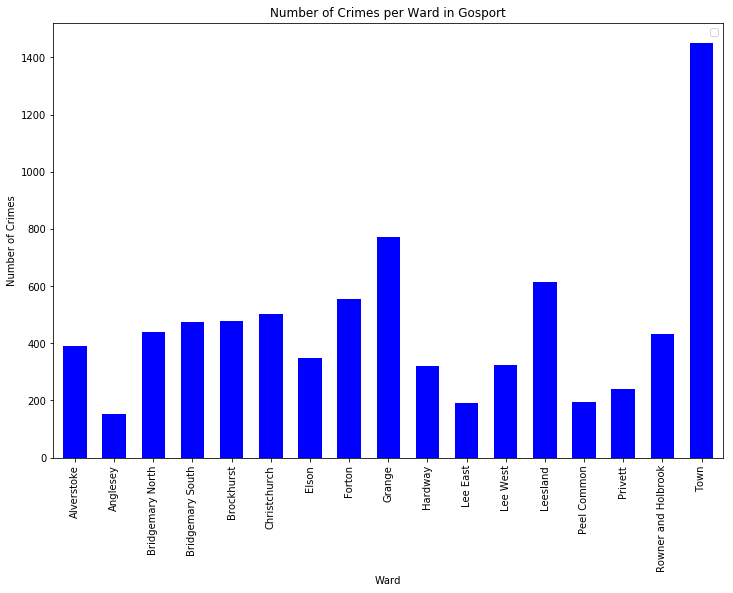

In [23]:
crime_data.plot(kind='bar',x='Ward',y='Crime Count',
                figsize=(12,8),
                width=0.6,
                color ='b')
plt.pyplot.xlabel("Ward")
plt.pyplot.ylabel("Number of Crimes")
plt.pyplot.title("Number of Crimes per Ward in Gosport")
plt.pyplot.legend("")

C:\Users\Adey\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Crime vs House Price')

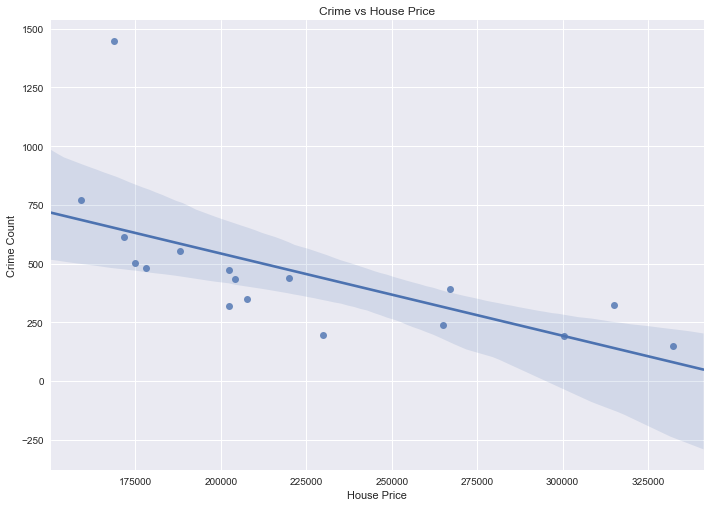

In [24]:
#build linear model diplay price and cfrime count relationship
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
x = crime_data['House Price']
y = crime_data['Crime Count']
sns.regplot(x,y,1)
plt.pyplot.title("Crime vs House Price")

C:\Users\Adey\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Crime vs House Price')

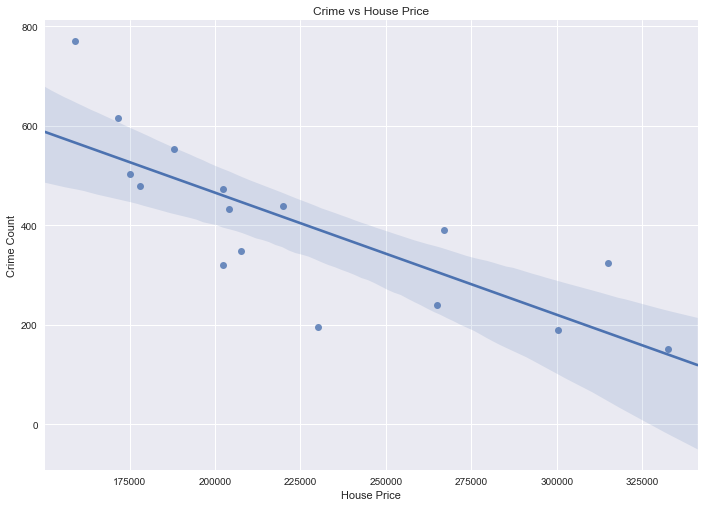

In [25]:
#drop town as make more than double the next value
temp_df = crime_data.drop([16])
x = temp_df['House Price']
y = temp_df['Crime Count']
sns.regplot(x,y,1)
plt.pyplot.title("Crime vs House Price")

In [81]:
# create map and display it
gosport_map = folium.Map(location=[lat, long], zoom_start=13)

gosport_map.choropleth(
    geo_data=gosport_geo,
    data=crime_data,
    columns=['Ward', 'Crime Count'],
    key_on='feature.properties.wd17nm',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime in Gosport across the Neighbourhoods')

#
os.chdir(r'C:\Users\Adey\OneDrive\IBM_DS\Capstone')
gosport_map.save('Gosport Crime.html')
# display the map of Gosport
gosport_map
###


In [27]:
crime_type = crime_df.groupby(['Crime type']).size().to_frame(name='Crime Count').reset_index()
crime_type.sort_values('Crime Count', ascending = False)

,Crime type,Crime Count
13,Violence and sexual offences,63563
3,Criminal damage and arson,18940
8,Public order,15909
6,Other theft,13601
0,Anti-social behaviour,13161
10,Shoplifting,12810
12,Vehicle crime,12244
2,Burglary,11940
4,Drugs,4139
1,Bicycle theft,3828


In [28]:
crime_type2 = crime_df2[['Ward','Crime type']]
crime_type2 =crime_type2.pivot_table(index ='Ward', columns='Crime type', aggfunc=pd.Series.count, fill_value=0)

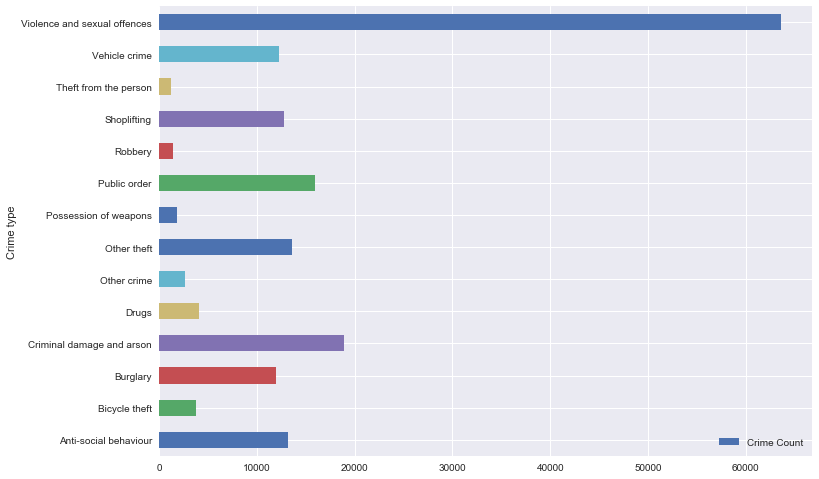

In [29]:
crime_type.plot(x='Crime type', y='Crime Count',kind='barh')

In [30]:
#examine burgery
#is_bur = crime_df2['Crime type'] == 'Burglary'
burg_df = crime_df2[crime_df2['Crime type'] == 'Burglary']
burg_df.head()

,Longitude,Latitude,LSOA code,LSOA name,Crime type,Ward,House Price
1,-1.180570,50.831316,E01022800,Gosport 001A,Burglary,Bridgemary North,220000
25,-1.182321,50.826966,E01022800,Gosport 001A,Burglary,Bridgemary North,220000
26,-1.177530,50.827337,E01022800,Gosport 001A,Burglary,Bridgemary North,220000
27,-1.182116,50.825706,E01022800,Gosport 001A,Burglary,Bridgemary North,220000
36,-1.182951,50.828284,E01022800,Gosport 001A,Burglary,Bridgemary North,220000


In [31]:
burg_df2 = burg_df.groupby(['Ward']).size().to_frame(name='Count').reset_index()
burg_df2

,Ward,Count
0,Alverstoke,29
1,Anglesey,12
2,Bridgemary North,18
3,Bridgemary South,34
4,Brockhurst,34
5,Christchurch,42
6,Elson,23
7,Forton,13
8,Grange,21
9,Hardway,20


In [76]:
# create map and display it
gosport_map = folium.Map(location=[lat, long], zoom_start=13)

gosport_map.choropleth(
    geo_data=gosport_geo,
    data=burg_df2,
    columns=['Ward', 'Count'],
    key_on='feature.properties.wd17nm',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Burglary Crime in Gosport across the Neighbourhoods')


# display the map of Gosport
gosport_map

In [80]:
#More detail look
from folium import plugins

gosport_map = folium.Map(location = [lat, long], zoom_start = 13)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(gosport_map)

gosport_map.choropleth(
    geo_data=gosport_geo,
    data=burg_df2,
    columns=['Ward', 'Count'],
    key_on='feature.properties.wd17nm',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Burglary Crime in Gosport across the Neighbourhoods')

# loop through the dataframe and add each data point to the mark cluster
for lati, lng, label, in zip(burg_df['Latitude'], burg_df['Longitude'], burg_df['Crime type']):
    folium.Marker(
        location=[lati, lng],
        icon= None,
        popup=label,
    ).add_to(incidents)

os.chdir(r'C:\Users\Adey\OneDrive\IBM_DS\Capstone')
gosport_map.save('Gosport  Burglary Crime.html')

# display map
gosport_map

In [34]:
#examine motor theft
veh_df = crime_df2[crime_df2['Crime type'] == 'Vehicle crime']
veh_df.head()


,Longitude,Latitude,LSOA code,LSOA name,Crime type,Ward,House Price
59,-1.182321,50.826966,E01022800,Gosport 001A,Vehicle crime,Bridgemary North,220000
77,-1.182321,50.826966,E01022800,Gosport 001A,Vehicle crime,Bridgemary North,220000
168,-1.181225,50.829567,E01022800,Gosport 001A,Vehicle crime,Bridgemary North,220000
180,-1.177550,50.828579,E01022801,Gosport 001B,Vehicle crime,Bridgemary North,220000
181,-1.176645,50.829184,E01022801,Gosport 001B,Vehicle crime,Bridgemary North,220000


In [35]:
veh_df2 = burg_df.groupby(['Ward']).size().to_frame(name='Count').reset_index()
veh_df2

,Ward,Count
0,Alverstoke,29
1,Anglesey,12
2,Bridgemary North,18
3,Bridgemary South,34
4,Brockhurst,34
5,Christchurch,42
6,Elson,23
7,Forton,13
8,Grange,21
9,Hardway,20


In [79]:
#More detail look at vehicle crime
gosport_map2 = folium.Map(location = [lat, long], zoom_start = 13)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(gosport_map2)

gosport_map2.choropleth(
    geo_data=gosport_geo,
    data=veh_df2,
    columns=['Ward', 'Count'],
    key_on='feature.properties.wd17nm',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Vehicle Crime in Gosport across the Neighbourhoods')

# loop through the dataframe and add each data point to the mark cluster
for lati, lng, label, in zip(veh_df['Latitude'], veh_df['Longitude'], veh_df['Crime type']):
    folium.Marker(
        location=[lati, lng],
        icon= None,
        popup=label,
    ).add_to(incidents)

os.chdir(r'C:\Users\Adey\OneDrive\IBM_DS\Capstone')
gosport_map.save('Gosport Vehicle Crime.html')
    
# display map
gosport_map2

In [37]:
## Explore Wards  icon=folium.Icon('info-sign'),
## foursquare 
CLIENT_ID = 'FZ3YCJJ5SFRN4EMRJRWTY4YQZOGZFOJ35GVE55V1YEAVGU3Q' # your Foursquare ID
CLIENT_SECRET = '3ZKXP3XO3QJWQGAMEMZ1O4EYOIVZ5ZEAEXWGB0FB12TOIPA2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FZ3YCJJ5SFRN4EMRJRWTY4YQZOGZFOJ35GVE55V1YEAVGU3Q
CLIENT_SECRET:3ZKXP3XO3QJWQGAMEMZ1O4EYOIVZ5ZEAEXWGB0FB12TOIPA2


In [38]:
##sort heighbourhoods
crime_data.sort_values('Crime Count')

,Ward,Crime Count,House Price
1,Anglesey,151,332433
10,Lee East,190,300500
13,Peel Common,195,230000
14,Privett,240,265000
9,Hardway,320,202250
11,Lee West,325,315000
6,Elson,348,207500
0,Alverstoke,391,267000
15,Rowner and Holbrook,433,204000
2,Bridgemary North,438,220000


In [39]:
## Anglesey has the lowest crime count
## get the lat and long of Anglesey
address = 'Anglesey' 
wards[8]['properties']

{'objectid': 2896,
 'wd17cd': 'E05004539',
 'wd17nm': 'Grange',
 'wd17nmw': ' ',
 'bng_e': 458411,
 'bng_n': 100627,
 'long': -1.17245996,
 'lat': 50.80220032,
 'st_areashape': 1352841.98578592,
 'st_lengthshape': 6167.4093004093,
 'style': {'weight': 1,
  'opacity': 0.2,
  'color': 'black',
  'fillOpacity': 0.7,
  'fillColor': '#feb24c'},
 'highlight': {}}

In [40]:
column_names = ['Neighbourhood','Latitude','Longitude']
neighbourhoods = pd.DataFrame(columns=column_names)

for i in range(17):
    neighbourhood_name = wards[i]['properties']['wd17nm']
    mylat = wards[i]['properties']['lat']
    mylong = wards[i]['properties']['long']
    neighbourhoods = neighbourhoods.append({'Neighbourhood':neighbourhood_name,
                                           'Latitude':mylat,
                                           'Longitude':mylong}, ignore_index = True)

In [41]:
neighbourhoods

,Neighbourhood,Latitude,Longitude
0,Alverstoke,50.786301,-1.16156
1,Anglesey,50.783199,-1.13577
2,Bridgemary North,50.832001,-1.17331
3,Bridgemary South,50.825401,-1.16649
4,Brockhurst,50.804600,-1.15482
5,Christchurch,50.798500,-1.13104
6,Elson,50.817299,-1.15143
7,Forton,50.804901,-1.14507
8,Grange,50.802200,-1.17246
9,Hardway,50.810200,-1.13804


In [42]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            50.783, 
            -1.1357, 
            1500, 
            20)
results = requests.get(url).json()['response']['groups'][0]['items'][0]['venue']['name']
results


'Stokes Bay'

In [43]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=20):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
        
    
    return(nearby_venues)

In [44]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [45]:
gosport_venues = getNearbyVenues(names=neighbourhoods['Neighbourhood'],
                                 latitudes = neighbourhoods['Latitude'],
                                 longitudes = neighbourhoods['Longitude']
                                )

Alverstoke
Anglesey
Bridgemary North
Bridgemary South
Brockhurst
Christchurch
Elson
Forton
Grange
Hardway
Lee East
Lee West
Leesland
Peel Common
Privett
Rowner and Holbrook
Town


In [46]:
print(gosport_venues.shape)
gosport_venues

(76, 7)


,Neighbourhood,Neighbourhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alverstoke,50.786301,-1.16156,Alverbank Country House Hotel,50.785683,-1.161346,Hotel
1,Alverstoke,50.786301,-1.16156,Stanley Park,50.787137,-1.160882,Park
2,Alverstoke,50.786301,-1.16156,Hong Kong Express,50.784836,-1.165156,Chinese Restaurant
3,Alverstoke,50.786301,-1.16156,The Seahorse,50.788602,-1.164433,Pub
4,Alverstoke,50.786301,-1.16156,Diving Museum,50.786821,-1.168284,Science Museum
5,Alverstoke,50.786301,-1.16156,Stokes Bay Paddling Pool,50.783541,-1.156008,Pool
6,Anglesey,50.783199,-1.13577,karen hemmings,50.782863,-1.132761,Food Truck
7,Anglesey,50.783199,-1.13577,Haslar sea wall,50.780202,-1.132199,Waterfront
8,Anglesey,50.783199,-1.13577,Gosport Park,50.787219,-1.137365,Park
9,Anglesey,50.783199,-1.13577,little anglesea lake,50.784559,-1.142492,Lake


In [47]:
gosport_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Alverstoke,6,6,6,6,6,6
Anglesey,4,4,4,4,4,4
Bridgemary North,4,4,4,4,4,4
Bridgemary South,4,4,4,4,4,4
Brockhurst,4,4,4,4,4,4
Christchurch,4,4,4,4,4,4
Elson,4,4,4,4,4,4
Forton,4,4,4,4,4,4
Grange,3,3,3,3,3,3


In [48]:
print('There are {} uniques categories.'.format(len(gosport_venues['Venue Category'].unique())))

There are 34 uniques categories.


In [49]:
## analyse each neighbourhood
# one hot encoding
gosport_onehot = pd.get_dummies(gosport_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
gosport_onehot['Neighbourhood'] = gosport_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [gosport_onehot.columns[-1]] + list(gosport_onehot.columns[:-1])
gosport_onehot = gosport_onehot[fixed_columns]

gosport_onehot.head()

,Neighbourhood,Auto Garage,Bar,Beach,Bus Stop,Business Service,Chinese Restaurant,Coffee Shop,Convenience Store,Fast Food Restaurant,...,Pool,Pub,Sandwich Place,Science Museum,Skating Rink,Soccer Field,Supermarket,Sushi Restaurant,Warehouse Store,Waterfront
0,Alverstoke,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alverstoke,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alverstoke,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alverstoke,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,Alverstoke,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [50]:
gosport_onehot.shape

(76, 35)

In [51]:
gosport_grouped = gosport_onehot.groupby('Neighbourhood').mean().reset_index()
gosport_grouped

,Neighbourhood,Auto Garage,Bar,Beach,Bus Stop,Business Service,Chinese Restaurant,Coffee Shop,Convenience Store,Fast Food Restaurant,...,Pool,Pub,Sandwich Place,Science Museum,Skating Rink,Soccer Field,Supermarket,Sushi Restaurant,Warehouse Store,Waterfront
0,Alverstoke,0.00,0.00,0.0,0.00,0.0,0.166667,0.000000,0.00,0.000000,...,0.166667,0.166667,0.000000,0.166667,0.00,0.000000,0.000000,0.000000,0.000000,0.00
1,Anglesey,0.00,0.00,0.0,0.00,0.0,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.25
2,Bridgemary North,0.00,0.00,0.0,0.25,0.0,0.000000,0.000000,0.25,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00
3,Bridgemary South,0.00,0.00,0.0,0.00,0.0,0.000000,0.000000,0.25,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00
4,Brockhurst,0.00,0.25,0.0,0.00,0.0,0.000000,0.000000,0.00,0.000000,...,0.000000,0.250000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00
5,Christchurch,0.00,0.00,0.0,0.00,0.0,0.000000,0.000000,0.00,0.000000,...,0.000000,0.500000,0.000000,0.000000,0.00,0.000000,0.250000,0.000000,0.000000,0.00
6,Elson,0.00,0.00,0.0,0.00,0.0,0.000000,0.000000,0.00,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00
7,Forton,0.00,0.00,0.0,0.00,0.0,0.000000,0.000000,0.25,0.000000,...,0.000000,0.250000,0.000000,0.000000,0.00,0.000000,0.250000,0.000000,0.000000,0.00
8,Grange,0.00,0.00,0.0,0.00,0.0,0.000000,0.333333,0.00,0.000000,...,0.000000,0.000000,0.333333,0.000000,0.00,0.000000,0.333333,0.000000,0.000000,0.00
9,Hardway,0.00,0.00,0.0,0.00,0.2,0.200000,0.000000,0.20,0.000000,...,0.000000,0.200000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00


In [52]:
##print out each neighbour hood wih the top 5 most common venues

In [53]:
num_top_venues = 5

for hood in gosport_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = gosport_grouped[gosport_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alverstoke----
                venue  freq
0      Science Museum  0.17
1                 Pub  0.17
2                Park  0.17
3  Chinese Restaurant  0.17
4                Pool  0.17


----Anglesey----
         venue  freq
0   Waterfront  0.25
1   Food Truck  0.25
2         Park  0.25
3         Lake  0.25
4  Supermarket  0.00


----Bridgemary North----
                  venue  freq
0  Fast Food Restaurant  0.50
1              Bus Stop  0.25
2     Convenience Store  0.25
3           Auto Garage  0.00
4        Sandwich Place  0.00


----Bridgemary South----
                  venue  freq
0         Grocery Store  0.25
1            Playground  0.25
2     Convenience Store  0.25
3  Fast Food Restaurant  0.25
4           Auto Garage  0.00


----Brockhurst----
              venue  freq
0      Home Service  0.25
1     Grocery Store  0.25
2               Pub  0.25
3               Bar  0.25
4  Sushi Restaurant  0.00


----Christchurch----
             venue  freq
0              Pub  0.50
1  H

In [54]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [55]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = gosport_grouped['Neighbourhood']

for ind in np.arange(gosport_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(gosport_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alverstoke,Pool,Hotel,Science Museum,Chinese Restaurant,Pub,Park,Convenience Store,Furniture / Home Store,Food Truck,Fish & Chips Shop
1,Anglesey,Waterfront,Lake,Park,Food Truck,Gym / Fitness Center,Gastropub,Gas Station,Furniture / Home Store,Fish & Chips Shop,Fast Food Restaurant
2,Bridgemary North,Fast Food Restaurant,Convenience Store,Bus Stop,Grocery Store,Gastropub,Gas Station,Furniture / Home Store,Food Truck,Fish & Chips Shop,Waterfront
3,Bridgemary South,Convenience Store,Fast Food Restaurant,Playground,Grocery Store,Bus Stop,Business Service,Chinese Restaurant,Coffee Shop,Gym / Fitness Center,Beach
4,Brockhurst,Grocery Store,Bar,Home Service,Pub,Fast Food Restaurant,Gastropub,Gas Station,Furniture / Home Store,Food Truck,Fish & Chips Shop
5,Christchurch,Pub,Harbor / Marina,Supermarket,Convenience Store,Gastropub,Gas Station,Furniture / Home Store,Food Truck,Fish & Chips Shop,Fast Food Restaurant
6,Elson,Grocery Store,Fast Food Restaurant,Furniture / Home Store,Pet Store,Gastropub,Gas Station,Food Truck,Fish & Chips Shop,Waterfront,Gym / Fitness Center
7,Forton,Grocery Store,Convenience Store,Supermarket,Pub,Gastropub,Gas Station,Furniture / Home Store,Food Truck,Fish & Chips Shop,Fast Food Restaurant
8,Grange,Coffee Shop,Supermarket,Sandwich Place,Convenience Store,Gastropub,Gas Station,Furniture / Home Store,Food Truck,Fish & Chips Shop,Fast Food Restaurant
9,Hardway,Pub,Business Service,Chinese Restaurant,Fish & Chips Shop,Convenience Store,Fast Food Restaurant,Gastropub,Gas Station,Furniture / Home Store,Food Truck


In [56]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

gosport_grouped_clustering = gosport_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(gosport_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 1, 1, 3, 0, 1, 0, 4, 2])

In [57]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

gosport_merged = neighbourhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
gosport_merged = gosport_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

gosport_merged.head() # check the last columns!

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alverstoke,50.786301,-1.16156,2.0,Pool,Hotel,Science Museum,Chinese Restaurant,Pub,Park,Convenience Store,Furniture / Home Store,Food Truck,Fish & Chips Shop
1,Anglesey,50.783199,-1.13577,2.0,Waterfront,Lake,Park,Food Truck,Gym / Fitness Center,Gastropub,Gas Station,Furniture / Home Store,Fish & Chips Shop,Fast Food Restaurant
2,Bridgemary North,50.832001,-1.17331,1.0,Fast Food Restaurant,Convenience Store,Bus Stop,Grocery Store,Gastropub,Gas Station,Furniture / Home Store,Food Truck,Fish & Chips Shop,Waterfront
3,Bridgemary South,50.825401,-1.16649,1.0,Convenience Store,Fast Food Restaurant,Playground,Grocery Store,Bus Stop,Business Service,Chinese Restaurant,Coffee Shop,Gym / Fitness Center,Beach
4,Brockhurst,50.804600,-1.15482,3.0,Grocery Store,Bar,Home Service,Pub,Fast Food Restaurant,Gastropub,Gas Station,Furniture / Home Store,Food Truck,Fish & Chips Shop


In [58]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

gosport_merged['Cluster Labels'] = gosport_merged['Cluster Labels'].fillna(value=0).astype(int)

# create map
map_clusters = folium.Map(location=[lat, long], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(gosport_merged['Latitude'], gosport_merged['Longitude'], gosport_merged['Neighbourhood'], gosport_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7
    ).add_to(map_clusters)
       
map_clusters

In [59]:
gosport_merged.loc[gosport_merged['Cluster Labels'] == 0, gosport_merged.columns[[0] + list(range(4, gosport_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Christchurch,Pub,Harbor / Marina,Supermarket,Convenience Store,Gastropub,Gas Station,Furniture / Home Store,Food Truck,Fish & Chips Shop,Fast Food Restaurant
7,Forton,Grocery Store,Convenience Store,Supermarket,Pub,Gastropub,Gas Station,Furniture / Home Store,Food Truck,Fish & Chips Shop,Fast Food Restaurant
10,Lee East,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Leesland,Auto Garage,Supermarket,Pub,Grocery Store,Beach,Bus Stop,Business Service,Chinese Restaurant,Bar,Gym / Fitness Center
16,Town,Supermarket,Fast Food Restaurant,Warehouse Store,Park,Pet Store,Grocery Store,Waterfront,Fish & Chips Shop,Gas Station,Furniture / Home Store


In [60]:
gosport_merged.loc[gosport_merged['Cluster Labels'] == 1, gosport_merged.columns[[0] + list(range(4, gosport_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bridgemary North,Fast Food Restaurant,Convenience Store,Bus Stop,Grocery Store,Gastropub,Gas Station,Furniture / Home Store,Food Truck,Fish & Chips Shop,Waterfront
3,Bridgemary South,Convenience Store,Fast Food Restaurant,Playground,Grocery Store,Bus Stop,Business Service,Chinese Restaurant,Coffee Shop,Gym / Fitness Center,Beach
6,Elson,Grocery Store,Fast Food Restaurant,Furniture / Home Store,Pet Store,Gastropub,Gas Station,Food Truck,Fish & Chips Shop,Waterfront,Gym / Fitness Center


In [61]:
gosport_merged.loc[gosport_merged['Cluster Labels'] == 2, gosport_merged.columns[[0] + list(range(4, gosport_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alverstoke,Pool,Hotel,Science Museum,Chinese Restaurant,Pub,Park,Convenience Store,Furniture / Home Store,Food Truck,Fish & Chips Shop
1,Anglesey,Waterfront,Lake,Park,Food Truck,Gym / Fitness Center,Gastropub,Gas Station,Furniture / Home Store,Fish & Chips Shop,Fast Food Restaurant
9,Hardway,Pub,Business Service,Chinese Restaurant,Fish & Chips Shop,Convenience Store,Fast Food Restaurant,Gastropub,Gas Station,Furniture / Home Store,Food Truck
11,Lee West,Pub,Gastropub,Beach,Coffee Shop,Fish & Chips Shop,Fast Food Restaurant,Gas Station,Furniture / Home Store,Food Truck,Waterfront
15,Rowner and Holbrook,Gym / Fitness Center,Hotel,Skating Rink,Pub,Fast Food Restaurant,Gastropub,Gas Station,Furniture / Home Store,Food Truck,Fish & Chips Shop


In [62]:
gosport_merged.loc[gosport_merged['Cluster Labels'] == 3, gosport_merged.columns[[0] + list(range(4, gosport_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Brockhurst,Grocery Store,Bar,Home Service,Pub,Fast Food Restaurant,Gastropub,Gas Station,Furniture / Home Store,Food Truck,Fish & Chips Shop
13,Peel Common,Grocery Store,Chinese Restaurant,Sushi Restaurant,Soccer Field,Pub,Convenience Store,Gas Station,Furniture / Home Store,Food Truck,Fish & Chips Shop
14,Privett,Pizza Place,Gas Station,Soccer Field,Park,Pub,Grocery Store,Waterfront,Furniture / Home Store,Food Truck,Fish & Chips Shop


In [63]:
gosport_merged.loc[gosport_merged['Cluster Labels'] == 4, gosport_merged.columns[[0] + list(range(4, gosport_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Grange,Coffee Shop,Supermarket,Sandwich Place,Convenience Store,Gastropub,Gas Station,Furniture / Home Store,Food Truck,Fish & Chips Shop,Fast Food Restaurant
